In [1]:
import chess
import time
from search import *
from evaluate import *
from analysis import *
from hashing import *

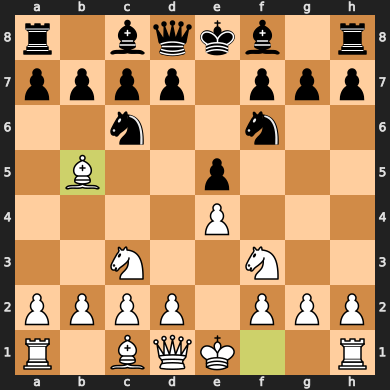

In [2]:
s = scoring_from_json("evaluation/sunfish.json")
board = chess.Board()

board.push_san("e4")
board.push_san("e5")
board.push_san("Nf3")
board.push_san("Nc6")
board.push_san("Nc3")
board.push_san("Nf6")
board.push_san('Bb5')

board

In [ ]:
# ======= HEATMAP =======

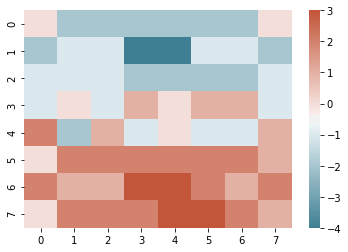

In [80]:
sns.heatmap(heatmap_from_board(board), cmap=cmap)

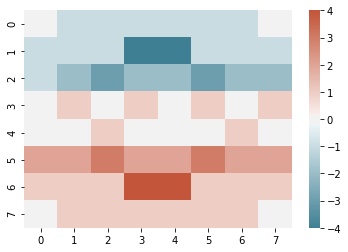

In [85]:
hm, gh = heatmap_from_game("testgame.pgn")
sns.heatmap(hm[1], cmap=cmap)

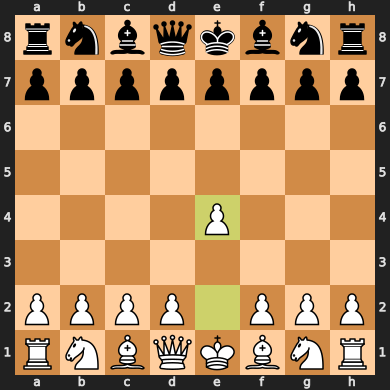

In [86]:
gh[1]

In [3]:
# ======= SEARCH TREES =======

27.61466693878174


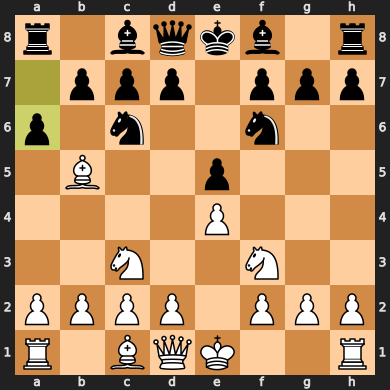

In [3]:
# search without transposition tables

t_0 = time.time()

game = Node(board, parent=None, score=None, move=None)
game.data["zobrist_key"] = hash_board(board)
game.data["hashval"] = game.data["zobrist_key"] % 10000000

move = alpha_beta_search(game, 4, s, create_variations_2, -1000000, 1000000)

t_1 = time.time()
print(t_1 - t_0)

board.push(move)
board

7.776904582977295


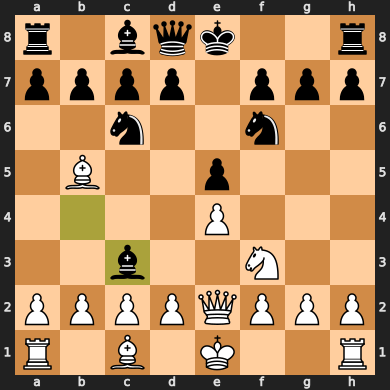

In [5]:
t_0 = time.time()  # transposition table isn't working and I have no idea why

game = Node(board, parent=None, score=None, move=None)

move = alpha_beta_search_2(game, 4, s, -1000000, 1000000)

t_1 = time.time()
print(t_1 - t_0)

board.push(move)
board

In [28]:
def rehash(h_0, board, move):  # pre-move board, chess.Move
    newhash = h_0
    from_sq = move.from_square
    to_sq = move.to_square
    ind = board.piece_type_at(from_sq) + 6 * board.color_at(from_sq) - 1
    
    if ind in [5, 11] and from_sq in [4, 60]:
        newhash = hash_board(board)
        return newhash 
    
    newhash ^= zobrist_keys[from_sq][ind]
    newhash ^= zobrist_keys[to_sq][ind]
    
    if board.piece_type_at(to_sq) is not None:
        ind = board.piece_type_at(to_sq) + 6 * board.color_at(to_sq) - 1
        newhash ^= zobrist_keys[to_sq][ind]
        
    return newhash

In [29]:
b = chess.Board()
b_hash = hash_board(b)
b_hash

17468949233433307241

In [33]:
move = chess.Move(chess.E4, chess.D5)
print(rehash(b_hash, b, move))
b.push(move)

b_hash = hash_board(b)
print(b_hash)

859191148214896386
859191148214896386
